In [228]:
# Handle necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
# Load dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
validation = pd.read_csv('data/validation.csv')

In [239]:
# Sample training data
train.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,...,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,...,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [232]:
# Look at the dataset fields
train.columns

Index([u'click', u'weekday', u'hour', u'bidid', u'logtype', u'userid',
       u'useragent', u'IP', u'region', u'city', u'adexchange', u'domain',
       u'url', u'urlid', u'slotid', u'slotwidth', u'slotheight',
       u'slotvisibility', u'slotformat', u'slotprice', u'creative',
       u'bidprice', u'payprice', u'keypage', u'advertiser', u'usertag'],
      dtype='object')

In [747]:
# Dataset statistics
dataset_stats = pd.DataFrame()
dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
dataset_stats['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
dataset_stats['cost'] = train.groupby('advertiser').payprice.sum().values
dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions) * 1000).round(2)).astype(str)
dataset_stats['eCPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

dataset_stats

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,540293,451,37231239,0.083%,68909.35,82552.64
1,2259,146778,45,13649026,0.031%,92990.95,303311.69
2,2261,120619,37,10789152,0.031%,89448.2,291598.7
3,2821,231416,144,20625766,0.062%,89128.52,143234.49
4,2997,54487,251,3413227,0.461%,62642.96,13598.51
5,3358,304782,233,28145288,0.076%,92345.64,120795.23
6,3386,498554,358,38341028,0.072%,76904.46,107097.84
7,3427,454031,340,36820111,0.075%,81096.03,108294.44
8,3476,346778,175,27481402,0.05%,79247.82,157036.58


In [485]:
# User feedback analysis
# 1. Analyzing CTR per day of the week

daily_CTR = pd.DataFrame()
daily_CTR['day'] = np.sort(train.weekday.unique())

click = train.groupby('weekday').click.value_counts()

imp_1458 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','weekday']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
daily_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
daily_CTR['clicks_3358'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values

daily_CTR['CTR_1458'] = ((daily_CTR.clicks_1458 / daily_CTR.imps_1458) * 100).round(3)
daily_CTR['CTR_3358'] = ((daily_CTR.clicks_3358 / daily_CTR.imps_3358) * 100).round(3)

In [486]:
daily_CTR

,day,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,83994,33238,66,21,0.079,0.063
1,1,72204,30707,63,11,0.087,0.036
2,2,73810,26206,63,14,0.085,0.053
3,3,76509,81073,68,79,0.089,0.097
4,4,76835,41414,72,39,0.094,0.094
5,5,78485,58888,65,50,0.083,0.085
6,6,78456,33256,54,19,0.069,0.057


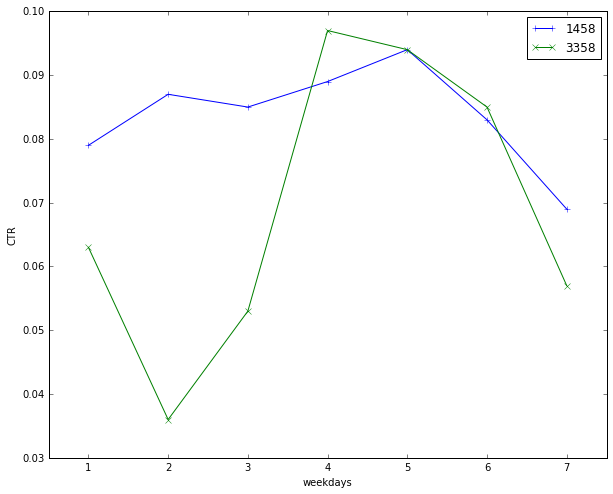

In [491]:
# Line plot of CTR per day of the week for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3358.values,marker='x', label='3358')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(10,8)
plt.draw()
plt.show()

In [517]:
# 2. Analyzing CTR per hour
hourly_CTR = pd.DataFrame()

hourly_CTR['hour'] = np.sort(train.hour.unique())

imp_1458 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','hour']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
hourly_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
click3358 = list(clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values)
click3358 = click3358[:4] + [0] + click3358[4:]
hourly_CTR['clicks_3358'] = click3358

hourly_CTR['CTR_1458'] = ((hourly_CTR.clicks_1458 / hourly_CTR.imps_1458) * 100).round(3)
hourly_CTR['CTR_3358'] = ((hourly_CTR.clicks_3358 / hourly_CTR.imps_3358) * 100).round(3)

In [518]:
hourly_CTR

,hour,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,25499,72359,23,70,0.090,0.097
1,1,11251,7583,8,8,0.071,0.105
2,2,6811,3527,14,2,0.206,0.057
3,3,7189,1447,6,2,0.083,0.138
4,4,3580,1307,6,0,0.168,0.000
5,5,4292,1103,4,1,0.093,0.091
6,6,5138,2797,2,4,0.039,0.143
7,7,10675,2835,5,1,0.047,0.035
8,8,15682,7960,9,6,0.057,0.075
9,9,19621,4700,18,1,0.092,0.021


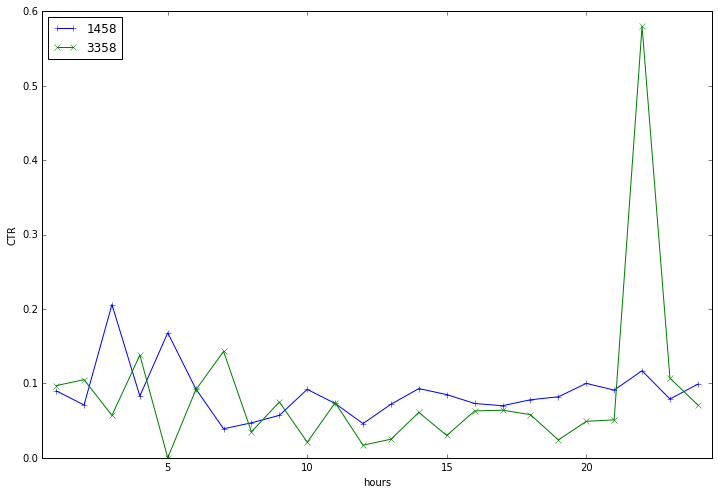

In [519]:
# Line plot of CTR per hour for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3358.values,marker='x', label='3358')
plt.legend(loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
ax.set_xlim(xmin = 0.5 , xmax = 24.5)
f.set_size_inches(12,8)
plt.draw()
plt.show()

In [622]:
# 3. Analyzing CTR per region
region_CTR = pd.DataFrame()

region_CTR['region'] = np.sort(train.region.unique())

imp_1458 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','region']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
region_CTR['clicks_1458'] = clickall_1458.groupby(level='region').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
region_CTR['clicks_3358'] = clickall_3358.groupby(level='region').sum().values

region_CTR['CTR_1458'] = ((region_CTR.clicks_1458 / region_CTR.imps_1458) * 100).round(3)
region_CTR['CTR_3358'] = ((region_CTR.clicks_3358 / region_CTR.imps_3358) * 100).round(3)

In [623]:
region_CTR

,region,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,7844,6162,9,13,0.115,0.211
1,1,23389,12157,17,6,0.073,0.049
2,2,8875,4820,3,2,0.034,0.041
3,3,27398,13246,20,15,0.073,0.113
4,15,16674,7968,18,7,0.108,0.088
5,27,7616,3754,5,3,0.066,0.080
6,40,20449,8965,9,6,0.044,0.067
7,55,12091,4823,11,2,0.091,0.041
8,65,12566,5684,11,5,0.088,0.088
9,79,14300,9523,17,9,0.119,0.095


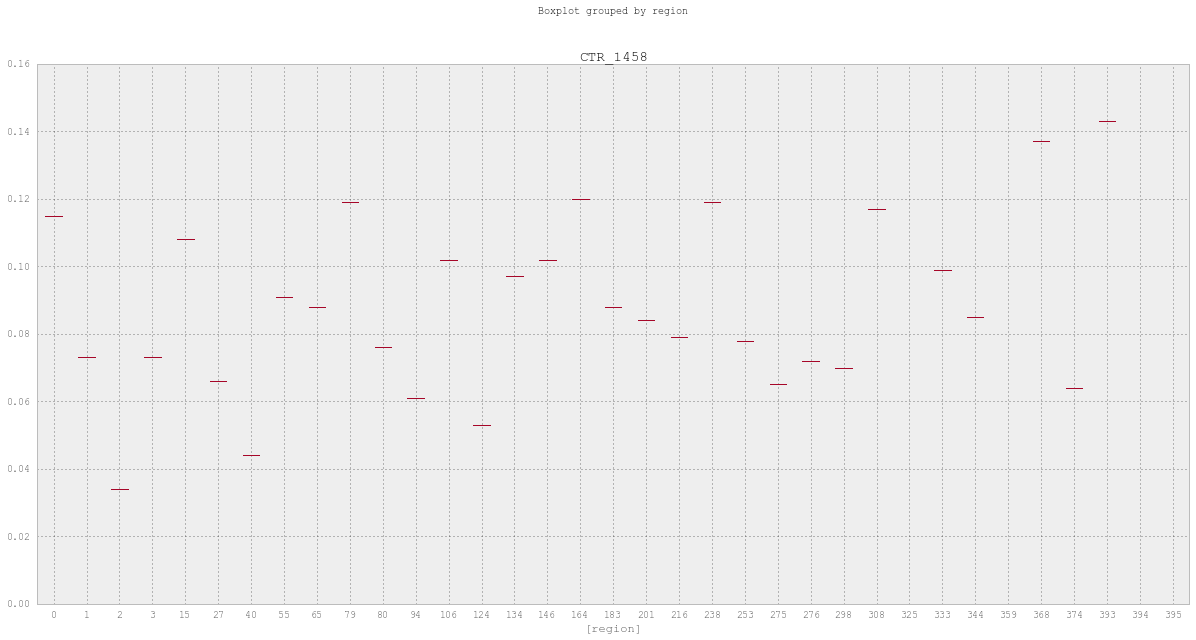

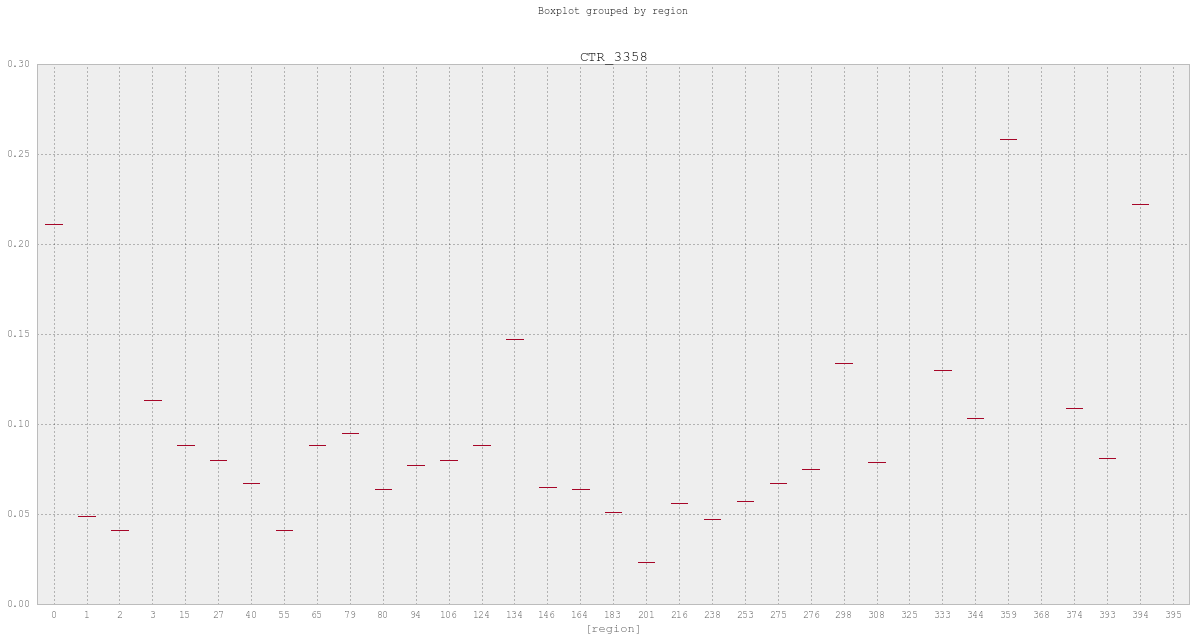

In [679]:
# Boxplot of CTR per region for advertiser 1458 & 3358
a1=region_CTR[['region','CTR_1458']]
ax1 = a1.boxplot(by='region', return_type='axes',figsize=(20,10))
a2 = region_CTR[['region','CTR_3358']]
a2.boxplot(by='region',figsize=(20,10))

In [706]:
# 4. Analyzing CTR per ad exchange
adexchange_CTR = pd.DataFrame()

adexchange_CTR['ad_exchange'] = np.sort(train.adexchange.unique())
adexchange_CTR = adexchange_CTR.drop([3,4])
imp_1458 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','adexchange']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_1458'] = clickall_1458.groupby(level='adexchange').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_3358'] = clickall_3358.groupby(level='adexchange').sum().values

adexchange_CTR['CTR_1458'] = ((adexchange_CTR.clicks_1458 / adexchange_CTR.imps_1458) * 100).round(3)
adexchange_CTR['CTR_3358'] = ((adexchange_CTR.clicks_3358 / adexchange_CTR.imps_3358) * 100).round(3)

In [707]:
adexchange_CTR

,ad_exchange,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,1,182219,159379,146,146,0.080,0.092
1,2,160460,93691,126,48,0.079,0.051
2,3,197614,51712,179,39,0.091,0.075


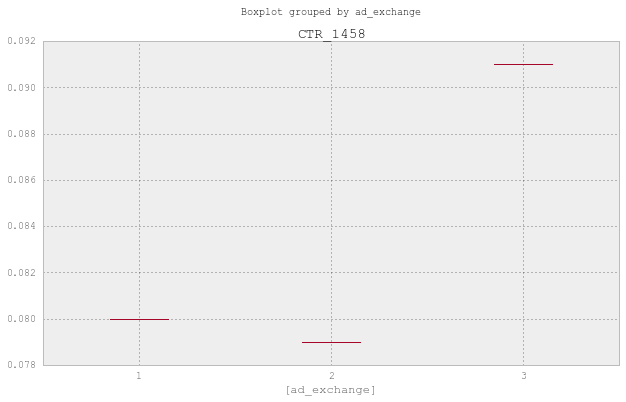

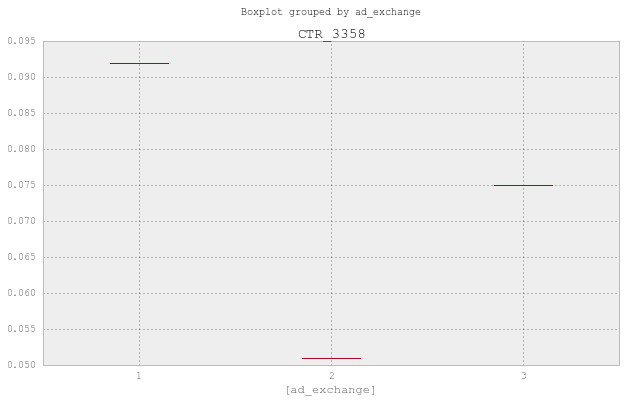

In [709]:
# Boxplot of CTR per ad exchange for advertiser 1458 & 3358
a1=adexchange_CTR[['ad_exchange','CTR_1458']]
ax1 = a1.boxplot(by='ad_exchange', return_type='axes',figsize=(10,6))
a2 = adexchange_CTR[['ad_exchange','CTR_3358']]
a2.boxplot(by='ad_exchange',figsize=(10,6))

In [727]:
# 4. Analyzing CTR per user agent
useragent_CTR = pd.DataFrame()

useragent_CTR['useragent'] = np.sort(train.useragent.unique())
useragent_CTR = useragent_CTR.drop([12,18,25])
imp_1458 = train.groupby('useragent').advertiser.value_counts()
useragent_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('useragent').advertiser.value_counts()
useragent_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

# click = train.groupby(['advertiser','adexchange']).click.value_counts()
# clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
# clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
# adexchange_CTR['clicks_1458'] = clickall_1458.groupby(level='adexchange').sum().values

# clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
# clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
# adexchange_CTR['clicks_3358'] = clickall_3358.groupby(level='adexchange').sum().values

# adexchange_CTR['CTR_1458'] = ((adexchange_CTR.clicks_1458 / adexchange_CTR.imps_1458) * 100).round(3)
# adexchange_CTR['CTR_3358'] = ((adexchange_CTR.clicks_3358 / adexchange_CTR.imps_3358) * 100).round(3)

ValueError: Length of values does not match length of index

In [725]:
imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458]

useragent         advertiser
android_chrome    1458              74
android_firefox   1458               5
android_ie        1458               3
android_maxthon   1458               6
android_opera     1458              96
android_other     1458             243
android_safari    1458            3044
android_sogou     1458               1
ios_other         1458               3
ios_safari        1458             101
linux_chrome      1458             202
linux_firefox     1458              62
linux_opera       1458               3
linux_other       1458              16
linux_safari      1458              15
mac_chrome        1458             251
mac_firefox       1458             107
mac_maxthon       1458               8
mac_opera         1458               4
mac_other         1458            1622
mac_safari        1458            9445
mac_sogou         1458               1
other_chrome      1458               4
other_ie          1458               9
other_opera       1458             

In [724]:
imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358]

useragent         advertiser
android_chrome    3358             101
android_firefox   3358               4
android_ie        3358               2
android_maxthon   3358               5
android_opera     3358             145
android_other     3358             233
android_safari    3358            3813
android_sogou     3358               1
ios_other         3358               4
ios_safari        3358              65
linux_chrome      3358             146
linux_firefox     3358              43
linux_opera       3358               3
linux_other       3358               9
linux_safari      3358              25
mac_chrome        3358             250
mac_firefox       3358              97
mac_maxthon       3358               6
mac_opera         3358               3
mac_other         3358            2576
mac_safari        3358            7847
mac_sogou         3358               7
other_ie          3358               2
other_opera       3358              34
other_other       3358             

In [750]:
train_bids

advertiser
1458              [300]
2259         [277, 294]
2261         [294, 277]
2821         [294, 277]
2997              [277]
3358    [227, 241, 238]
3386              [300]
3427    [238, 241, 227]
3476    [249, 238, 254]
Name: bidprice, dtype: object

# Constant bidding

In [821]:
def constant_bidding(constant):
    advertiser={}
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 25000
    for  click,bid_price in validation[['click','bidprice']].values:
#         if advertiser == adv:
            if constant > bid_price:
                impression += 1
                clicks += click
                cost += bid_price
#             advertiser['adv'] = [impression,clicks, cost]
            if cost > budget:
                break
    return impression,clicks, cost
        
# for adv in np.sort((validation.advertiser.unique())).values:
#     constant_bidding(310, adv)
[imps, clicks, cost] = constant_bidding(300)

print('impressions won', imps)
print('total spend', cost)
print('CTR', (clicks/imps * 100).round(2).astype(str))
print('CPM', (cost/imps * 1000).round(2).astype(str))
print('CPC', (cost/clicks).round(2).astype(str))

('impressions won', 100.0)
('total spend', 25106.0)
('CTR', '0.0')
('CPM', '251060.0')
('CPC', 'inf')


# Random bidding

In [781]:
from random import randrange

def random_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    rand_no = randrange(constant)
    
    for click,bid_price in validation[['click','bidprice']].values:  
        if rand_no > bid_price:
            impression += 1
            clicks += click
            cost += bid_price
    return impression, clicks, cost
            
[imps, clicks, cost] = random_bidding(300)

print('impressions won', imps)
print('total spend', cost)
print('CTR', (clicks/imps * 100).round(3).astype(str))
print('CPM', (cost/imps * 1000).round(3).astype(str))
print('CPC', (cost/clicks).round(3).astype(str))

('impressions won', 145272.0)
('total spend', 35547776.0)
('CTR', '0.083')
('CPM', '244698.056')
('CPC', '293783.273')


In [802]:
bids = train.groupby('bidprice').advertiser.value_counts()
bids.iloc[bids.index.get_level_values('advertiser') == 3358]


bidprice  advertiser
227       3358          159379
238       3358           93691
241       3358           51712
Name: advertiser, dtype: int64

In [816]:
np.sort(validation.advertiser.unique())

array([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype=int64)

In [818]:
validation.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,250,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111"
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,50,FirstView,Na,118,11908,277,118,null,2997,null
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,90,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null
5,0,1,16,903211f027ca70f611544f42b94db094,1,u_VhTTPRKdOIm2Q-C,windows_chrome,116.52.130.*,308,309,...,250,0,1,0,e1af08818a6cd6bbba118bb54a651961,238,49,a5d0bde104fea52ea466c77b37948424,3476,"10077,10075,10059,10052,10083,10031,10057,1000..."
6,0,3,18,15274113eac79b065e186c1962c33632,1,u_Vh5hL5mAOIuVemB,windows_ie,180.173.153.*,79,79,...,90,0,0,52,b90c12ed2bd7950c6027bf9c6937c48a,300,52,361e128affece850342293213691a043,3386,null
7,0,2,0,9c963e762671efbc15c4e9fb3cef9c46,1,u_DAN0n0B6z9B,windows_ie,124.117.229.*,374,375,...,90,FirstView,Na,0,10717,294,86,null,2821,null
8,0,0,7,a483f16043e9f0057d542ee724cd81cb,1,u_VhkrLAFj3cnslVk,windows_ie,14.108.1.*,275,275,...,250,0,0,50,e1af08818a6cd6bbba118bb54a651961,254,212,a5d0bde104fea52ea466c77b37948424,3476,"10063,10006,10059,10083,13403,10031,10110"
9,0,0,7,2da6d0891a81ac8233bba9bcffde2159,1,u_VhkSOxduLTmcjmL,windows_chrome,60.171.29.*,106,110,...,90,2,0,5,48f2e9ba15708c0146bda5e1dd653caa,300,40,bebefa5efe83beee17a3d245e7c5085b,1458,"10031,13042,10006,10110"


In [820]:
len(validation), len(test)

(299749, 66)